# 機械学習のための Numpy 復習・予習ノート

茶帯編以降では、機械学習のアルゴリズムを学んでいきます。  
理解を深めるため、一部のアルゴリズムについては、実際に numpy を使って実装をおこなう課題も含まれます。  
このアルゴリズム実装を乗り越えられるよう、 numpy の基礎を復習しておきましょう。  

この Notebook は、前半は復習のための問題、後半は応用トピックを取り上げます。  
前半の復習問題は簡単すぎる！という方は、Notebook 末尾で触れている numpy 100 本ノックの問題に取り組んでみてください。  
講座で取り扱っていない関数も多数出てきますが、こんなこともできるのか、という発見があるはずです。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 復習１：配列からの値抽出＋α

慣れないうちは、配列からの値の抽出、特にインデックスを指定する方法は、混乱を招くものとなってしまうかもしれません。  
数をこなし、思い出しておきましょう。以下の意味を思い起こしておきつつ、問題に取り組んでみてください。
- `arr[1]`
- `arr[[1,3,5]]`
- `arr[:5]`
- `arr[::2]`
- `arr[1:2,3:4]`（2次元配列の場合）
- `arr[arr < 5]`
- `arr[np.where(arr % 8 == 0)]`

In [5]:
arr = np.arange(64).reshape((8, 8))
arr[np.where(arr % 8 == 0)]

array([ 0,  8, 16, 24, 32, 40, 48, 56])

In [13]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

1. `arr` の3行目の値（`16, 17, ...`）を全て抽出してください。
2. `arr` から偶数の値を抽出してください。
3. `arr` の左上から右下の対角線上にある値を抽出してください。
4. `arr` の偶数番目のカラム（1行目なら 1, 3, ...）の値を全て抽出してください。
5. `arr` から、`10, 11, 12, 18, 19, 20, 34, 35, 36` の値を抽出してください。
6. `arr` から奇数の値を抽出し、その合計値を算出してください。
7. `arr` の各行ごとに、行の値の合計値を算出してください。

In [29]:
a = [ 8,  9, 10, 11, 12, 13, 14, 15]
a2 = np.array(a)
a2.sum(axis=0)

92

In [7]:
#7
arr.sum(axis=1)

array([ 28,  92, 156, 220, 284, 348, 412, 476])

In [8]:
#6
arr[[arr % 2 == 1]].sum()

1024

In [9]:
#5
arr[[1,2,4],2:5]

array([[10, 11, 12],
       [18, 19, 20],
       [34, 35, 36]])

In [10]:
arr[3]

array([24, 25, 26, 27, 28, 29, 30, 31])

In [11]:
arr[arr % 2 ==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62])

In [12]:
[arr[i][i] for i in range(8)]

[0, 9, 18, 27, 36, 45, 54, 63]

In [10]:
arr[:,1::2]

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23],
       [25, 27, 29, 31],
       [33, 35, 37, 39],
       [41, 43, 45, 47],
       [49, 51, 53, 55],
       [57, 59, 61, 63]])

## 復習２：四則演算、行列積

四則演算、行列積は、最も基本的かつ重要な処理です。直感的に使いこなせるようになっておく必要がありますので、算数の例題を使い、復習することにします。

以下では、おつかいで商品を買いに行くという想定のもと、購入する商品の価格表を示します。  
普通の商品とちょっといい商品が、交互に定義されています。


| 品目 | 税抜価格（円） |
|-----| -----|
| ほうれん草 | 158 |
| 水耕栽培サラダほうれん草 | 188 |
| トマト | 98 |
| 糖度最高級フルーツトマト | 168 |
| りんご | 198 |
| ふじりんご | 398 |
| 白米 5kg | 1580 |
| 魚沼産コシヒカリ 2kg | 1180 |


In [30]:
price = np.array([158, 188, 98, 168, 198, 398, 1580, 1180])


ほうれん草2束、ふじりんご5個を買いました。**必ず** `price` 配列を使って、`+` 演算子を使わず、税込合計金額を求めてください。額は小数点以下切り捨てとします。

In [31]:
np.floor(np.dot(price[[0,5]],1.08))

array([170., 429.])

In [32]:
cost = price * np.array([2,0,0,0,5,0,0,0])*1.08
cost.sum()

1410.48

In [33]:
np.floor((price[[2,5]] * [2,5]).sum() *1.08)

2360.0

ちょっといい商品を、それぞれ3つずつ買うことにしました。`price` 配列を使って、`+` 演算子を使わず、税込合計金額を求めてください。額は小数点以下切り捨てとします。

In [34]:
 np.floor((price[1::2] *3).sum() + 1.08)

5803.0

自宅の買い物だけでなく、他の人の買い物もしてあげることになりました。  
そこで、誰にどれだけ商品を買っていくかをまとめた表を作っておくことにしました。  

|品目                   | 自宅 |     Aくん    |    Bくん   |
|----------------------|:----:|:-----------:|:---------:|
| ほうれん草             |  2  |       0      |     0     |
| 水耕栽培サラダほうれん草 |  0  |       2      |     0     |
| トマト                |  3  |       1      |     0     |
| 糖度最高級フルーツトマト |  0  |       3      |     3     |
| りんご                |  0  |       3      |     3     |
| ふじりんご             |  4  |       0      |     3     |
| 白米 5kg              |  1  |       1      |     0     |
| 魚沼産コシヒカリ 2kg    |  0  |       1      |     0     |


In [36]:
amount = np.array([[2, 0, 0], [0, 2, 0], [3, 1, 0], [0, 3, 3],
                   [0, 3, 3], [4, 0, 3], [1, 1, 0], [0, 1, 0]])
amount

array([[2, 0, 0],
       [0, 2, 0],
       [3, 1, 0],
       [0, 3, 3],
       [0, 3, 3],
       [4, 0, 3],
       [1, 1, 0],
       [0, 1, 0]])

行列積を使い、購入に必要な金額の小計を依頼者ごとに求めてください。また、金額の合計も求めてください。

In [37]:
amount.T

array([[2, 0, 3, 0, 0, 4, 1, 0],
       [0, 2, 1, 3, 3, 0, 1, 1],
       [0, 0, 0, 3, 3, 3, 0, 0]])

In [38]:
amount.T.shape

(3, 8)

In [39]:
price2 = np.dot(amount.T,price)
price2

array([3782, 4332, 2292])

In [40]:
price3 = np.dot(amount.T,price).sum() *1.08
np.floor(price3)

11238.0

In [41]:
price2 = np.dot(price,amount)
price2

array([3782, 4332, 2292])

お駄賃として自宅からは500円、Bくんからは10％のマージンを1円単位、小数点以下切り上げで取ることにしました。  
Aくんは小銭を持っておらず、細かなおつりをとっておいていいそうです。  
各依頼者に出してもらう金額と、粗利合計を求めてください。`+` 演算子は含めても構いません。

## 応用１：グラフ描画前の典型的な準備パターンを身につける

###  $y=f(x)$ の描画
$y = f(x)$ で表される式をグラフで描画する場合、以下のような処理を内部でおこないます。

1. 関数 $f$ に入力する $x$ をたくさん用意する
2. それぞれの $x$ に対し $f(x)$ の結果を得る
3. $(x, f(x))$ の配列を、グラフ描画関数に渡す

In [42]:
def f(x):
    return 3 * x**3 - 4 * x **2 + x - 8

上記関数 $f(x)$ のグラフを、$[-1, 1]$ の区間で描画してください。  
ポイントのサンプル数を 10, 50, 100 と変えて、結果を確認してください。

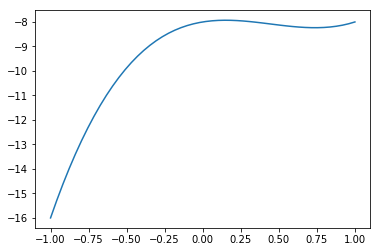

In [43]:
#x =  # 値を生成する numpy の関数がありました。何を使えば良いでしょうか？
#y = 
#plt.plot(x, y)
x =  np.linspace(-1,1,50)
y = f(x)
plt.plot(x, y)

### 参考：$z = g(x, y)$ の場合

変数が2つある場合は、どうなるでしょうか？  
この場合、上記とは別の関数を運用し、$(x, y)$ の組み合わせを作成します。以下の関数を実行してみてください。

## もっと numpy と仲良くなりたい場合は...

numpy 100本ノックとでもいうべき問題を作成し、[github](https://github.com/rougier/numpy-100/blob/master/100%20Numpy%20exercises%20no%20solution.ipynb) で公開している人がいます。  
復習として、以下のオススメ問題にチャレンジしてみてください。同じリポジトリ内で、回答も用意されています。  
ピンと来なければ、一旦スキップして良いと思います。  

オススメ問題ピックアップ：  

```
自分で解けるようにしておきたい問題
10, 15, 18, 19, 21, 22, 24, 25, 37, 39, 40, 45, 50, 58, 59, 72, 100

解答を見てテクニックを勉強したい問題
4, 16, 20, 23, 27, 29, 30, 35, 36, 38, 41, 42, 43, 46, 48, 51, 54, 55,
67, 68, 70, 75, 77, 81, 83, 89, 92, 95
```
